In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-poster')

In [2]:
tanzania_data = pd.read_csv('datasets/training.csv')

In [37]:
tanzania_data.describe()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
count,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,...,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000
mean,4742.627291,38.239498,1.559910,1.787426,3.060051,2.548915,1.840569,1.397942,0.062165,0.630110,...,-0.431914,1.860164,3.163378,-6.034378,35.354029,0.553989,0.461517,0.432901,0.151255,1.799267
std,2731.120086,16.332148,0.496433,1.165160,1.557779,1.534257,0.366103,0.489508,0.241472,0.482809,...,1.489879,1.351372,1.317691,2.720888,2.899511,0.497112,0.498552,0.495512,0.358322,1.196955
min,1.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,1.000000,-11.467463,29.639578,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2397.250000,25.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,2.000000,-8.275387,32.935429,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4744.500000,35.000000,2.000000,1.000000,3.000000,3.000000,2.000000,1.000000,0.000000,1.000000,...,-1.000000,1.000000,4.000000,-6.087854,35.073326,1.000000,0.000000,0.000000,0.000000,2.000000
75%,7105.000000,48.000000,2.000000,3.000000,3.000000,4.000000,2.000000,2.000000,0.000000,1.000000,...,-1.000000,4.000000,4.000000,-3.517053,38.351815,1.000000,1.000000,1.000000,0.000000,3.000000
max,9459.000000,100.000000,2.000000,4.000000,8.000000,6.000000,2.000000,2.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,-1.084000,40.258744,1.000000,1.000000,1.000000,1.000000,3.000000


In [4]:
# Checking if there is any missing values in the dataset
print(tanzania_data.isnull().any().sum())

0


In [41]:
# Making sure there are no duplicates in the ID field
tanzania_data[tanzania_data.duplicated(subset='ID', keep='first')]

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification


In [42]:
males = tanzania_data[tanzania_data.Q2 == 1]
females = tanzania_data[tanzania_data.Q2 == 2]
males.describe()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
count,3122.000000,3122.000000,3122.0,3122.000000,3122.000000,3122.000000,3122.000000,3122.000000,3122.000000,3122.000000,...,3122.000000,3122.000000,3122.000000,3122.000000,3122.000000,3122.000000,3122.000000,3122.000000,3122.000000,3122.000000
mean,4722.603780,39.206278,1.0,1.772261,3.266176,2.373158,1.793722,1.295964,0.085202,0.674888,...,-0.350096,1.641896,2.964766,-6.056623,35.337667,0.627482,0.508328,0.473094,0.148943,1.991672
std,2738.099419,16.593633,0.0,1.239513,1.580663,1.576448,0.404697,0.456548,0.279226,0.468492,...,1.601460,1.223978,1.384924,2.703175,2.909334,0.483553,0.500011,0.499356,0.356089,1.156149
min,1.000000,16.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,1.000000,-11.467463,29.639578,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2377.500000,26.000000,1.0,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,1.000000,-8.300167,32.912624,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4718.500000,35.000000,1.0,1.000000,3.000000,1.000000,2.000000,1.000000,0.000000,1.000000,...,-1.000000,1.000000,4.000000,-6.130945,35.073172,1.000000,1.000000,0.000000,0.000000,3.000000
75%,7093.750000,49.750000,1.0,2.000000,3.000000,4.000000,2.000000,2.000000,0.000000,1.000000,...,-1.000000,1.000000,4.000000,-3.531331,38.385231,1.000000,1.000000,1.000000,0.000000,3.000000
max,9459.000000,100.000000,1.0,4.000000,8.000000,6.000000,2.000000,2.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,-1.087705,40.255075,1.000000,1.000000,1.000000,1.000000,3.000000


In [43]:
females.describe()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
count,3972.000000,3972.000000,3972.0,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,...,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000,3972.000000
mean,4758.365811,37.479607,2.0,1.799345,2.898036,2.687059,1.877392,1.478097,0.044058,0.594914,...,-0.496224,2.031722,3.319486,-6.016893,35.366889,0.496224,0.424723,0.401309,0.153072,1.648036
std,2725.863440,16.084996,0.0,1.103220,1.520257,1.485938,0.328028,0.499583,0.205251,0.490970,...,1.392767,1.420433,1.240382,2.734942,2.892068,0.500049,0.494363,0.490225,0.360102,1.206876
min,2.000000,16.000000,2.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,1.000000,-11.466611,29.639578,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2411.500000,25.000000,2.0,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,2.000000,-8.240882,32.957542,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4774.000000,34.000000,2.0,1.000000,3.000000,3.000000,2.000000,1.000000,0.000000,1.000000,...,-1.000000,1.000000,4.000000,-6.072129,35.073337,0.000000,0.000000,0.000000,0.000000,1.000000
75%,7107.500000,46.000000,2.0,3.000000,3.000000,4.000000,2.000000,2.000000,0.000000,1.000000,...,-1.000000,4.000000,4.000000,-3.487150,38.327971,1.000000,1.000000,1.000000,0.000000,3.000000
max,9457.000000,100.000000,2.0,4.000000,7.000000,6.000000,2.000000,2.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,-1.084000,40.258744,1.000000,1.000000,1.000000,1.000000,3.000000


In [8]:
x = len(females)

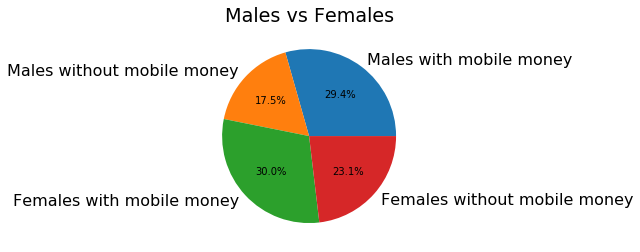

In [60]:
# Comparison of females with mobile money and females without mobile money

w = len(females[females.mobile_money == 1]) / total * 100
w = len(females[females.mobile_money == 0]) /total * 100

total = len(tanzania_data)
y = len(males[males.mobile_money == 1]) / total * 100
z = len(males[males.mobile_money == 0]) /total * 100
plt.pie([y, z, w, x],explode=None,labels=['Males with mobile money', 'Males without mobile money',
                                          'Females with mobile money', 'Females without mobile money'],
        autopct='%1.1f%%')

plt.title('Males vs Females')
plt.show()

In [10]:
# Average ages for people to have Mobile Money
average_male_age = males[males.mobile_money == 1].Q1.mean()
average_female_age = females[females.mobile_money == 1].Q1.mean()
average_male_age

37.12404287901991

In [11]:
# How each gender recieve money
males_wages = males[males.Q8_1 == 1]
males_trade = males[males.Q8_2 == 1]
males_service = males[males.Q8_3 == 1]
males_piece = males[males.Q8_4 == 1]
males_rent = males[males.Q8_5 == 1]
males_invest = males[males.Q8_6 == 1]
males_pension = males[males.Q8_7 == 1]
males_welfare = males[males.Q8_8 == 1]
males_3rd_party = males[males.Q8_9 == 1]
males_other = males[males.Q8_11 == 1]

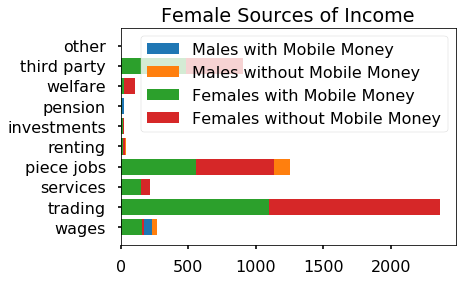

In [52]:
# Male sources of income
male_sources_of_income = [males_wages, males_trade,males_service,males_piece,
                          males_rent, males_invest, males_pension, males_welfare,
                          males_3rd_party, males_other]
sources_with_mm = []
sources_without_mm = []

for source in male_sources_of_income:
    sources_with_mm.append(len(source[source.mobile_money == 1]))
    sources_without_mm.append(len(source[source.mobile_money == 0]))

# plt.subplot(2,1,2)
plt.barh(np.arange(10), sources_with_mm, label='Males with Mobile Money')
plt.barh(np.arange(10), sources_without_mm, left=sources_with_mm, label='Males without Mobile Money')
plt.title('Male Sources of Income')
plt.yticks(np.arange(10), 
           ['wages', 'trading', 'services', 
           'piece jobs', 'renting', 'investments', 
           'pension', 'welfare', 'third party', 'other'])
# plt.legend(loc='upper right')
# plt.show()

# Females sources of income
female_sources_of_income = [females_wages, females_trade,females_service,females_piece,
                            females_rent, females_invest, females_pension, females_welfare, 
                            females_3rd_party, females_other]
sources_with_mm = []
sources_without_mm = []

for source in female_sources_of_income:
    sources_with_mm.append(len(source[source.mobile_money == 1]))
    sources_without_mm.append(len(source[source.mobile_money == 0]))

# plt.subplot(2,1,2)
plt.barh(np.arange(10), sources_with_mm, label='Females with Mobile Money')
plt.barh(np.arange(10), sources_without_mm, left=sources_with_mm, label='Females without Mobile Money')
plt.title('Female Sources of Income')
plt.yticks(np.arange(10), 
           ['wages', 'trading', 'services', 
           'piece jobs', 'renting', 'investments', 
           'pension', 'welfare', 'third party', 'other'])
plt.legend(loc='upper right')
plt.show()

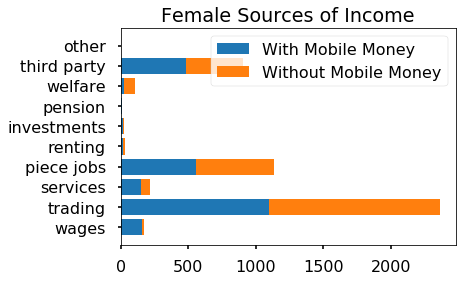

In [14]:
# Females sources of income
female_sources_of_income = [females_wages, females_trade,females_service,females_piece,
                            females_rent, females_invest, females_pension, females_welfare, 
                            females_3rd_party, females_other]
sources_with_mm = []
sources_without_mm = []

for source in female_sources_of_income:
    sources_with_mm.append(len(source[source.mobile_money == 1]))
    sources_without_mm.append(len(source[source.mobile_money == 0]))

# plt.subplot(2,1,2)
plt.barh(np.arange(10), sources_with_mm, label='With Mobile Money')
plt.barh(np.arange(10), sources_without_mm, left=sources_with_mm, label='Without Mobile Money')
plt.title('Female Sources of Income')
plt.yticks(np.arange(10), 
           ['wages', 'trading', 'services', 
           'piece jobs', 'renting', 'investments', 
           'pension', 'welfare', 'third party', 'other'])
plt.legend(loc='upper right')
plt.show()

In [15]:
# Seperating individuals with different relationship statuses
married = tanzania_data[tanzania_data.Q3 == 1]
divorced = tanzania_data[tanzania_data.Q3 == 2]
widowed = tanzania_data[tanzania_data.Q3 == 3]
single = tanzania_data[tanzania_data.Q3 == 4]

relationships = [married, divorced, widowed, single]

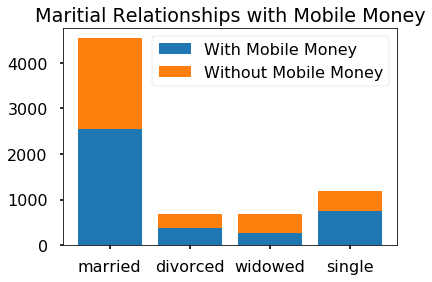

In [16]:
len_relationships_with_mm = []
len_relationships_without_mm = []

for status in relationships:
    len_relationships_with_mm.append(len(status[status.mobile_money == 1]))
    len_relationships_without_mm.append(len(status[status.mobile_money == 0]))
    
plt.bar(np.arange(4), len_relationships_with_mm, label='With Mobile Money')
plt.bar(np.arange(4), len_relationships_without_mm,  bottom=len_relationships_with_mm,label='Without Mobile Money')
plt.xticks(np.arange(4), ['married', 'divorced', 'widowed', 'single'])
plt.title('Maritial Relationships with Mobile Money')

plt.legend(loc='upper right')
plt.show()

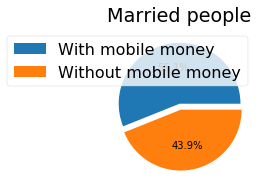

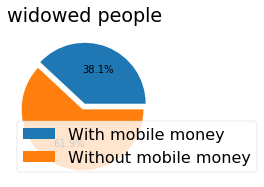

In [17]:
plt.subplot(1, 2, 1)
y = len(married[married.mobile_money == 1]) / len(married) * 100
z = len(married[married.mobile_money == 0]) / len(married) * 100
plt.title('Married people')
plt.pie([y, z], explode=(0,0.1),autopct='%1.1f%%')
plt.legend(['With mobile money', 'Without mobile money'], loc='upper right')
plt.show()

plt.subplot(1, 2, 2)
y = len(widowed[widowed.mobile_money == 1]) / len(widowed) * 100
z = len(widowed[widowed.mobile_money == 0]) / len(widowed) * 100
plt.title('widowed people')
plt.pie([y, z], explode=(0,0.1),autopct='%1.1f%%')
plt.legend(['With mobile money', 'Without mobile money'], loc='best')
plt.show()

/home/wonderboy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/wonderboy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


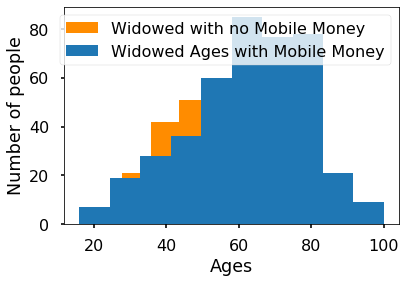

In [56]:
# Ages with mobile mone
ages_with_mm = widowed[tanzania_data.mobile_money == 1]
ages_without_mm = widowed[tanzania_data.mobile_money == 0]


plt.hist(ages_with_mm.Q1, label='Widowed with no Mobile Money',color='darkorange')
plt.hist(ages_without_mm.Q1, label='Widowed Ages with Mobile Money')

plt.xlabel('Ages')
plt.ylabel('Number of people')
plt.legend(loc='best')
plt.show()

In [24]:
# Access to mobile phones
has_phone = tanzania_data[tanzania_data.Q7 == 1]
no_phone = tanzania_data[tanzania_data.Q7 == 2]

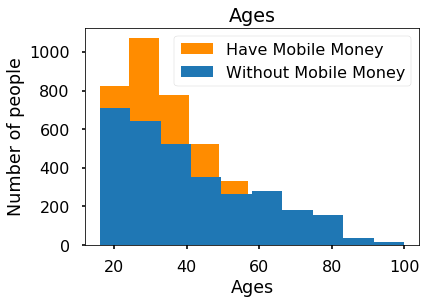

In [55]:
# Ages with mobile mone
ages_with_mm = tanzania_data[tanzania_data.mobile_money == 1]
ages_without_mm = tanzania_data[tanzania_data.mobile_money == 0]


plt.title('Ages')
plt.hist(ages_with_mm.Q1, label='Have Mobile Money',color='darkorange')
plt.hist(ages_without_mm.Q1,label='Without Mobile Money')

plt.xlabel('Ages')
plt.ylabel('Number of people')
plt.legend(loc='best')
plt.show()

In [26]:
len(has_phone)
len(no_phone)

2823

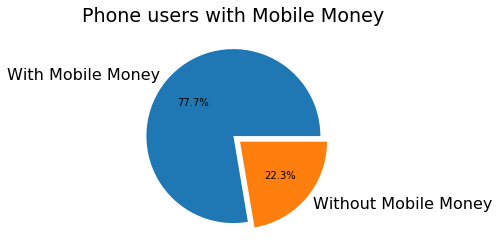

In [27]:
len(has_phone)
x = len(has_phone[has_phone.mobile_money == 1]) / len(has_phone) * 100
y = len(has_phone[has_phone.mobile_money == 0]) / len(has_phone) * 100

plt.title('Phone users with Mobile Money')
plt.pie([x, y], explode=(0, 0.1), labels=['With Mobile Money', 'Without Mobile Money'], autopct='%1.1f%%')
plt.show()

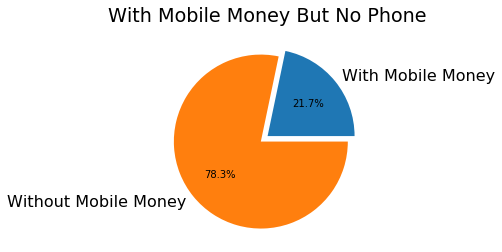

In [28]:
len(no_phone)
x = len(no_phone[no_phone.mobile_money == 1]) / len(no_phone) * 100
y = len(no_phone[no_phone.mobile_money == 0]) / len(no_phone) * 100

plt.title('With Mobile Money But No Phone')
plt.pie([x, y], explode=(0, 0.1), labels=['With Mobile Money', 'Without Mobile Money'], autopct='%1.1f%%')
plt.show()